In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

table = pd.read_csv('../train.csv') # https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
renaming = {
    'battery_power': 'Battery Capacity',
    'talk_time': 'Battery Life for Calls',
    'touch_screen': 'Touch Screen',
    'blue': 'Bluetooth',
    'wifi': 'Wifi',
    'dual_sim': 'Dual SIM',
    'four_g': '4G',
    'three_g': '3G',
    'n_cores': 'CPU Cores',
    'clock_speed': 'CPU Speed',
    'fc': 'Frontal Camera Mpx',
    'pc': 'Rear Camera Mpx',
    'int_memory': 'Storage',
    'ram': 'RAM',
    'm_dep': 'Depth',
    'mobile_wt': 'Weight',
    'px_height': 'Screen Height px',
    'px_width': 'Screen Width px',
    'sc_h': 'Screen Height cm',
    'sc_w': 'Screen Width cm',
    'price_range': 'Price Range'
}
df = pd.DataFrame(table)
df.rename(columns=renaming, inplace=True)

# Застосуйте методи зниження розмірності PCA і TSNE для візуалізації даних, знижуючи розмірність до двох

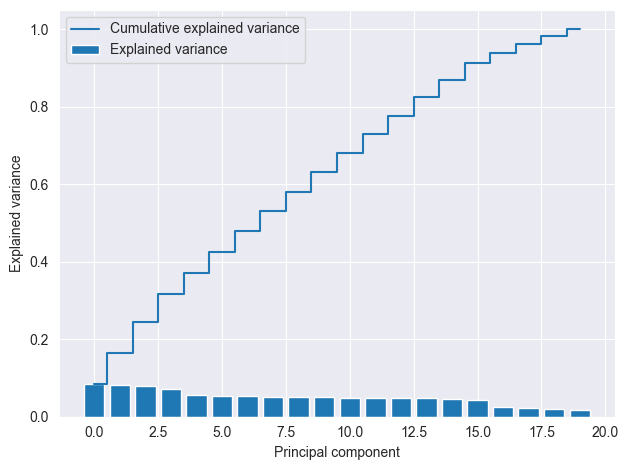

In [52]:
x = df.drop('Price Range', axis='columns')
y = df['Price Range']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

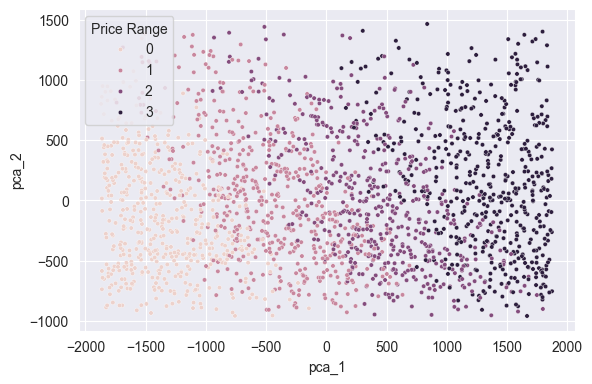

In [53]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'Price Range': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='Price Range', data=pca_result_df, ax=ax,s=10, legend="full")
ax.set_aspect('equal')

## tSNE

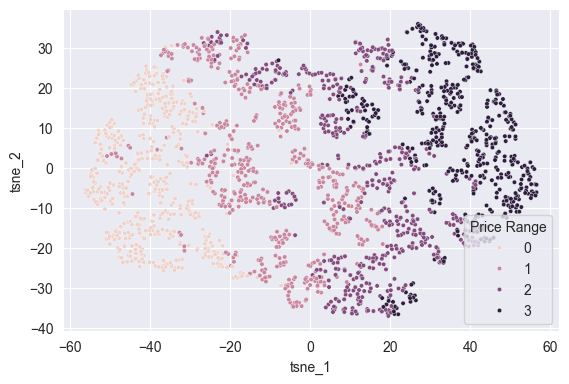

In [54]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(x)

fig, ax = plt.subplots(1)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'Price Range': y})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Price Range', data=tsne_result_df, ax=ax,s=10, legend="full")
ax.set_aspect('equal')

## За допомогою алгоритму k-means зробіть квантування зображення з глибиною 64,32,16 та 8 рівнів

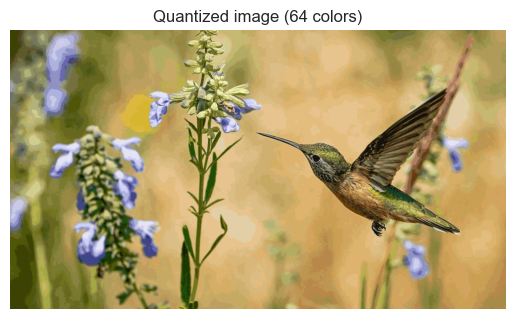

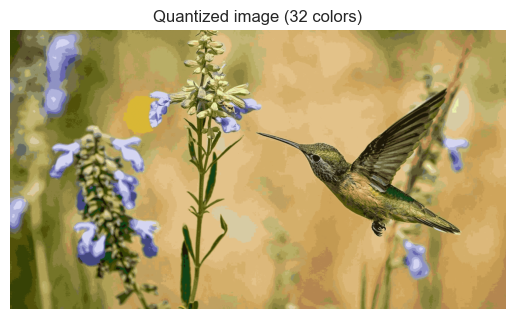

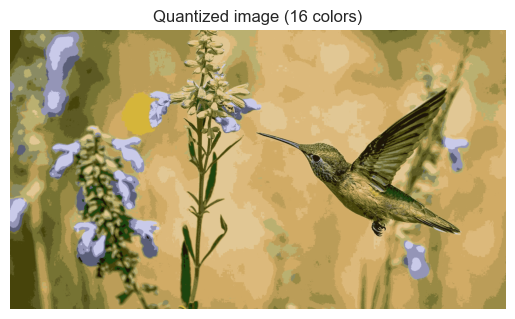

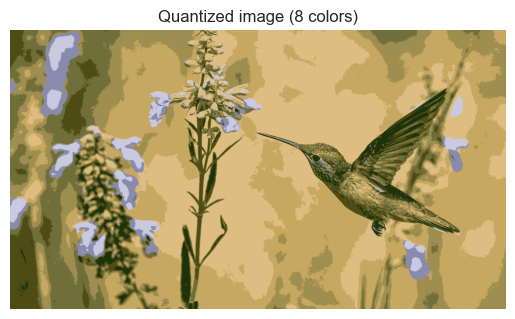

In [55]:
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.utils import shuffle

n_colors = [64, 32, 16, 8]
image = np.array(Image.open('th.jpg'), dtype=np.float64) / 255

w, h, d = tuple(image.shape)
image_array = np.reshape(image, (w * h, d))

for i in range(len(n_colors)):
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors[i], random_state=0).fit(image_array_sample)
    label = kmeans.predict(image_array)
    plt.figure()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors[i]} colors)")
    plt.imshow(kmeans.cluster_centers_[label].reshape(w, h, -1))

# nlp

In [56]:
df = pd.DataFrame(pd.read_csv('gender_tweets.csv'))[['gender', 'text']]

df.dropna(inplace=True, ignore_index=True)

df

,gender,text
0,male,Robbie E Responds To Critics After Win Against...
1,male,���It felt like they were my friends and I was...
2,male,i absolutely adore when louis starts the songs...
3,male,Hi @JordanSpieth - Looking at the url - do you...
4,female,Watching Neighbours on Sky+ catching up with t...
...,...,...
19948,female,"@lookupondeath ...Fine, and I'll drink tea too..."
19949,male,Greg Hardy you a good player and all but don't...
19950,male,You can miss people and still never want to se...
19951,female,@bitemyapp i had noticed your tendency to pee ...


## Preprocessing

In [57]:
import re, string
import inflect

from nltk.corpus import stopwords

# Initialize inflect engine
p = inflect.engine()

# Function to convert ordinal string to words
def ordinal_to_words(ordinal_str):
    match = re.match(r"(\d+)(st|nd|rd|th)", ordinal_str)
    number = int(match.group(1))
    # Convert number to ordinal words
    return p.number_to_words(p.ordinal(number))


stopw = set(stopwords.words("english"))
stopw.update({"one", "time", "love", "u"})

def preprocess(transformer: str) -> str:
    transformer = transformer.lower()
    
    transformer = re.sub(r"https*\S+", " ", transformer)
    transformer = re.sub(r"^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-]+)(\.[a-zA-Z]{2,5}){1,2}$", " ", transformer)
    transformer = re.sub(r"@\S+", " ", transformer)
    transformer = re.sub(r"#\S+", " ", transformer)
    if re.match(r"(\d+)(st|nd|rd|th)", transformer):
        transformer = re.sub(r"(\d+)(st|nd|rd|th)", ordinal_to_words(transformer), transformer)
    transformer = re.sub(r"&amp;", " ", transformer)
    transformer = re.sub(r"&gt;", " ", transformer)
    transformer = re.sub(r"&lt;", " ", transformer)
    transformer = re.sub(r"-", " ", transformer)
    transformer = re.sub(r"\d", " ", transformer)
    transformer = re.sub(r"�۪", " ", transformer)
    transformer = re.sub(r"[٪ή]", " ", transformer)
    transformer = re.sub(r"ٍ", " ", transformer)
    transformer = re.sub(r"[�۝ُԍϭջωԏե]", " ", transformer)
    transformer = re.sub("[%s]" % re.escape(string.punctuation), " ", transformer)
    transformer = re.sub(r"\s{2,}", " ", transformer)
    transformer = ' '.join([word for word in transformer.split(' ') if word not in stopw])
    return transformer.strip()

df_copy = df.copy()

df_copy['text'] = df_copy['text'].apply(preprocess)

df

,gender,text
0,male,Robbie E Responds To Critics After Win Against...
1,male,���It felt like they were my friends and I was...
2,male,i absolutely adore when louis starts the songs...
3,male,Hi @JordanSpieth - Looking at the url - do you...
4,female,Watching Neighbours on Sky+ catching up with t...
...,...,...
19948,female,"@lookupondeath ...Fine, and I'll drink tea too..."
19949,male,Greg Hardy you a good player and all but don't...
19950,male,You can miss people and still never want to se...
19951,female,@bitemyapp i had noticed your tendency to pee ...


## Візуалізація

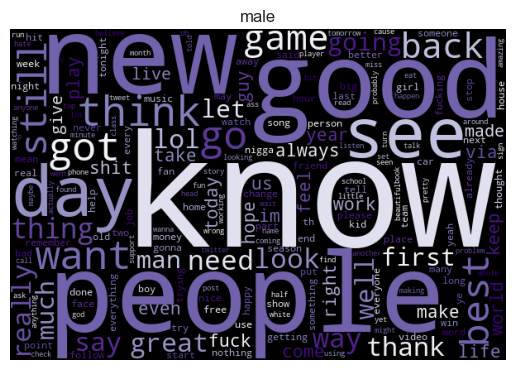

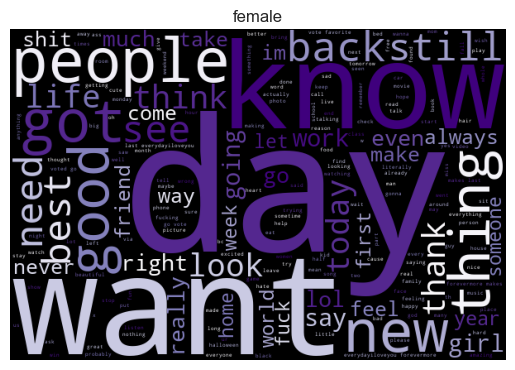

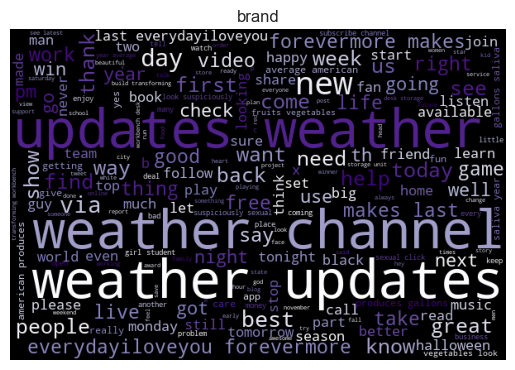

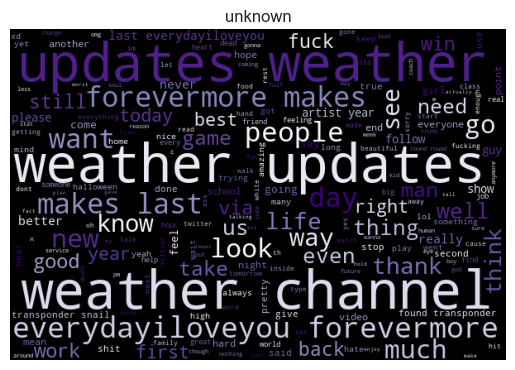

In [58]:
from wordcloud import WordCloud

for i in df_copy['gender'].unique():
    text = ''
    for tw in df_copy[df_copy['gender'] == i]['text']:
        text += tw + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="black", colormap='Purples_r').generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(i)
    plt.show()

## Векторизація та класифікація

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

df_vectors = df_copy.copy()
df_vectors[df_vectors['gender'] == 'unknown'] = 'brand'
df_vectors['gender'] = LabelEncoder().fit_transform(df['gender'])

X = df_vectors['text']
y = df_vectors['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

cv = CountVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

X_train_vectorised_tfidf = tfidf.fit_transform(X_train)
X_test_vectorised_tfidf = tfidf.transform(X_test)
X_train_vectorised_cv = cv.fit_transform(X_train)
X_test_vectorised_cv = cv.transform(X_test)

### Logistic Regression

In [60]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_vectorised_cv, y_train)
y_pred = logreg_model.predict(X_test_vectorised_cv)

print(f'CV:\nMatrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

logreg_model.fit(X_train_vectorised_tfidf, y_train)
y_pred = logreg_model.predict(X_test_vectorised_tfidf)

print(f'\nTF IDF:\nMatrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

CV:
Matrix:
[[630 284 261   2]
 [220 755 384   1]
 [187 561 484   3]
 [  0   0   0 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      1177
           1       0.47      0.56      0.51      1360
           2       0.43      0.39      0.41      1235
           3       0.97      1.00      0.99       219

    accuracy                           0.52      3991
   macro avg       0.62      0.62      0.62      3991
weighted avg       0.53      0.52      0.52      3991

Accuracy: 0.5231771485843147

TF IDF:
Matrix:
[[644 254 279   0]
 [198 773 389   0]
 [187 565 483   0]
 [  0   0   0 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.55      0.58      1177
           1       0.49      0.57      0.52      1360
           2       0.42      0.39      0.40      1235
           3       1.00      1.00      1.00       219

    accuracy                       

### Multinomial Naїve Bias

In [61]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train_vectorised_cv, y_train)
y_pred = mnb_model.predict(X_test_vectorised_cv)

print(f'CV:\nMatrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

mnb_model.fit(X_train_vectorised_tfidf, y_train)
y_pred = mnb_model.predict(X_test_vectorised_tfidf)

print(f'\nTF IDF:\nMatrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

CV:
Matrix:
[[416 372 388   1]
 [ 69 869 421   1]
 [ 69 637 526   3]
 [  0   0   0 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.35      0.48      1177
           1       0.46      0.64      0.54      1360
           2       0.39      0.43      0.41      1235
           3       0.98      1.00      0.99       219

    accuracy                           0.51      3991
   macro avg       0.65      0.60      0.60      3991
weighted avg       0.55      0.51      0.51      3991

Accuracy: 0.5086444500125282

TF IDF:
Matrix:
[[478 364 334   1]
 [101 885 373   1]
 [ 95 651 488   1]
 [  0   0   0 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1177
           1       0.47      0.65      0.54      1360
           2       0.41      0.40      0.40      1235
           3       0.99      1.00      0.99       219

    accuracy                       

### SVM

In [62]:
svc_model = SVC()
svc_model.fit(X_train_vectorised_cv, y_train)
y_pred = svc_model.predict(X_test_vectorised_cv)

print(f'CV:\nMatrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

svc_model.fit(X_train_vectorised_tfidf, y_train)
y_pred = svc_model.predict(X_test_vectorised_tfidf)

print(f'\nTF IDF:\nMatrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

CV:
Matrix:
[[596 314 266   1]
 [142 840 377   1]
 [148 591 495   1]
 [  0   0   0 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.51      0.58      1177
           1       0.48      0.62      0.54      1360
           2       0.43      0.40      0.42      1235
           3       0.99      1.00      0.99       219

    accuracy                           0.54      3991
   macro avg       0.64      0.63      0.63      3991
weighted avg       0.55      0.54      0.54      3991

Accuracy: 0.5387121022300175

TF IDF:
Matrix:
[[609 290 278   0]
 [152 822 386   0]
 [154 581 500   0]
 [  0   0   0 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.52      0.58      1177
           1       0.49      0.60      0.54      1360
           2       0.43      0.40      0.42      1235
           3       1.00      1.00      1.00       219

    accuracy                       

### Decision Tree

In [63]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_vectorised_cv, y_train)
y_pred = tree_model.predict(X_test_vectorised_cv)

print(f'CV:\nMatrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

tree_model.fit(X_train_vectorised_tfidf, y_train)
y_pred = tree_model.predict(X_test_vectorised_tfidf)

print(f'\nTF IDF:\nMatrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')

CV:
Matrix:
[[667 275 234   1]
 [300 662 397   1]
 [307 509 417   2]
 [  0   0   0 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.57      0.54      1177
           1       0.46      0.49      0.47      1360
           2       0.40      0.34      0.37      1235
           3       0.98      1.00      0.99       219

    accuracy                           0.49      3991
   macro avg       0.59      0.60      0.59      3991
weighted avg       0.49      0.49      0.49      3991

Accuracy: 0.4923578050613881

TF IDF:
Matrix:
[[633 305 239   0]
 [241 678 441   0]
 [260 533 442   0]
 [  0   0   0 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      1177
           1       0.45      0.50      0.47      1360
           2       0.39      0.36      0.38      1235
           3       1.00      1.00      1.00       219

    accuracy                       

### kNN

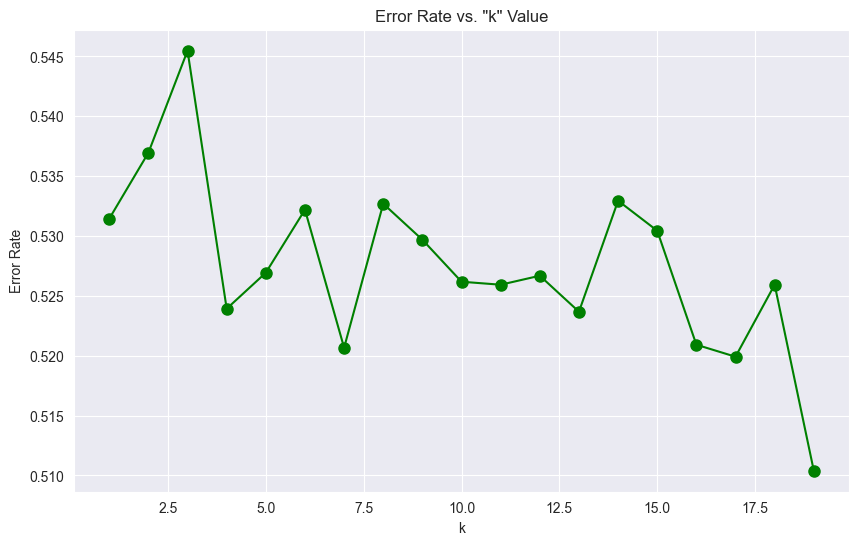

In [64]:
error_rate = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_vectorised_cv, y_train)
    pred_i = knn.predict(X_test_vectorised_cv)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1, 20), error_rate, marker='o', markersize=8, color='green')
plt.title('Error Rate vs. "k" Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

In [65]:
tfidf = TfidfVectorizer(ngram_range=(1, 2))

X_train_vectorised_tfidf = tfidf.fit_transform(X_train)
X_test_vectorised_tfidf = tfidf.transform(X_test)

mnb_model = MultinomialNB(alpha=1)

mnb_model.fit(X_train_vectorised_tfidf, y_train)
y_pred = mnb_model.predict(X_test_vectorised_tfidf)

print(f'\nTF IDF:\nMatrix:\n{confusion_matrix(y_test, y_pred)}\nClassification Report:\n{classification_report(y_test, y_pred)}\nAccuracy: {accuracy_score(y_test, y_pred)}')


TF IDF:
Matrix:
[[559 364 254   0]
 [107 965 288   0]
 [120 669 446   0]
 [  0   0   0 219]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.47      0.57      1177
           1       0.48      0.71      0.57      1360
           2       0.45      0.36      0.40      1235
           3       1.00      1.00      1.00       219

    accuracy                           0.55      3991
   macro avg       0.66      0.64      0.64      3991
weighted avg       0.57      0.55      0.54      3991

Accuracy: 0.5484840892007016
